In [240]:
import shap
import pandas as pd
from catboost import CatBoostClassifier, Pool
import matplotlib.pyplot as plt
import ast

In [255]:
dataset = pd.read_csv('../dataset/HR_result.csv').to_dict('records')

movies = pd.read_csv('../dataset/simpler_movie_dataset.csv')
movies = movies.drop_duplicates(subset='id').set_index('id').to_dict('index')

users = pd.read_csv('../dataset/user_metadata.csv', index_col='userId').to_dict('records')

In [256]:
user_dataset = pd.DataFrame(dataset[0], index=[0])
user_dataset['movies'] = user_dataset['movies'].apply(ast.literal_eval)
user_dataset['userId'] = user_dataset['userId'].astype('int')
user_dataset = user_dataset.explode('movies')[['userId', 'movies']]
user_dataset['movies'] = user_dataset['movies'].astype('int')
user_info = user_dataset['userId'].apply(lambda x: users[x]).apply(pd.Series)
mvs_info = user_dataset['movies'].apply(lambda x: movies[x]).apply(pd.Series)
dataset = pd.concat([user_dataset, user_info, mvs_info], axis=1).reset_index()

In [244]:
dataset.columns

Index(['index', 'userId', 'movies', 'total_movies', 'userAvgRating',
       'userAvgBudget', 'userTopLanguages', 'userTopGenres', 'userTopPH',
       'userAvgPopularity', 'userAvgMovieAge', 'userAvgRuntime', 'adult',
       'budget', 'genres', 'imdb_id', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries', 'revenue',
       'runtime', 'spoken_languages', 'video', 'vote_average', 'vote_count',
       'movie_age', 'abstract_col', 'title'],
      dtype='object')

In [257]:
col_list = ['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'vote_count', 'movie_age', 'production_companies', 'production_countries', 'spoken_languages', 'genres', 'total_movies', 'userAvgRating', 'userAvgBudget', 'userAvgPopularity', 'userAvgMovieAge', 'userAvgRuntime', 'userTopPH', 'userTopGenres']
categorical_col = ['production_companies', 'production_countries', 'spoken_languages', 'genres', 'userTopPH', 'userTopGenres']
dataset[categorical_col] = dataset[categorical_col].fillna('other')
dataset[col_list] = dataset[col_list].fillna(-1)

In [246]:
model =CatBoostClassifier()
model.load_model('../dataset/Catboost',           
           format="cbm")

In [289]:
explainer = shap.Explainer(model)

In [290]:
shap_values = explainer(dataset[col_list])
shap_values.display_data = dataset[col_list].values

In [291]:
mvsId = 387700
idx = dataset[dataset['movies']==mvsId].index[0]
water = shap.plots.waterfall(shap_values[idx], show=False)

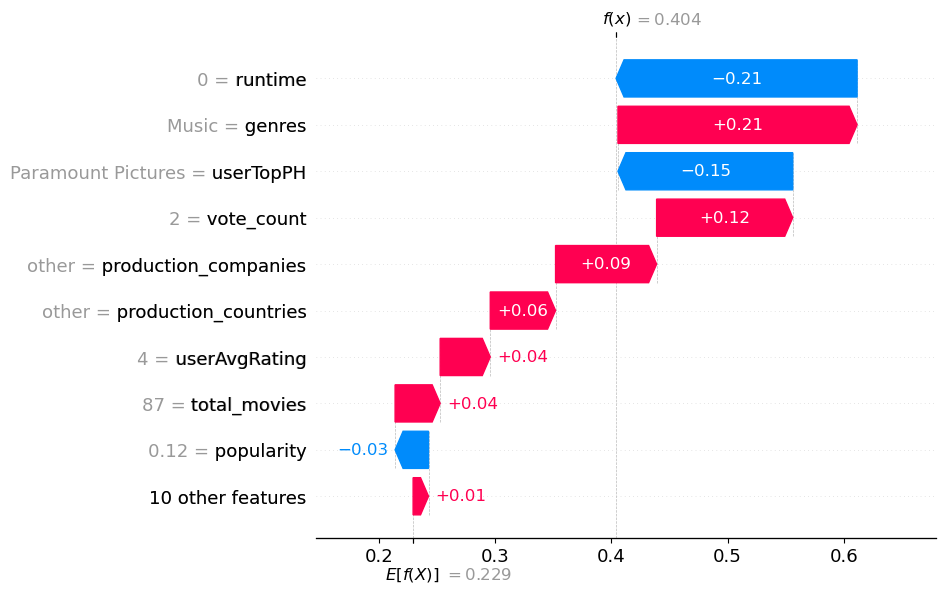

In [292]:
water

In [299]:
shap_values.data

array([[0, 0.055294, 0, 0, 4.5, 1, 2988, 'other', 'other', 'other',
        'Music', 87, 4.0, 1500000.0, 8.176863, 9523.0, 107.0,
        'Paramount Pictures', 'Comedy'],
       [0, 0.12007, 0, 0, 6.5, 2, 2598, 'other', 'other', 'other',
        'Music', 87, 4.0, 1500000.0, 8.176863, 9523.0, 107.0,
        'Paramount Pictures', 'Comedy'],
       [0, 0.117662, 0, 0, 8.0, 2, 10083, 'Castle Rock Entertainment',
        'Ireland', 'English', 'Romance', 87, 4.0, 1500000.0, 8.176863,
        9523.0, 107.0, 'Paramount Pictures', 'Comedy'],
       [0, 0.077756, 0, 0, 7.5, 2, 5225, 'other', 'Turkey', 'Türkçe',
        'other', 87, 4.0, 1500000.0, 8.176863, 9523.0, 107.0,
        'Paramount Pictures', 'Comedy'],
       [0, 0.108041, 0, 52, 4.3, 2, 5480, 'other', 'other', 'English',
        'Music', 87, 4.0, 1500000.0, 8.176863, 9523.0, 107.0,
        'Paramount Pictures', 'Comedy'],
       [0, 0.007914, 0, 87, 0.0, 0, 5624, 'Badbird',
        'United States of America', 'English', 'Documentary',

In [298]:
shap.plots.scatter(shap_values[:, -1], color=shap_values[:,-1])

ValueError: could not convert string to float: 'Comedy'